In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D 

(0.0, 15.0)

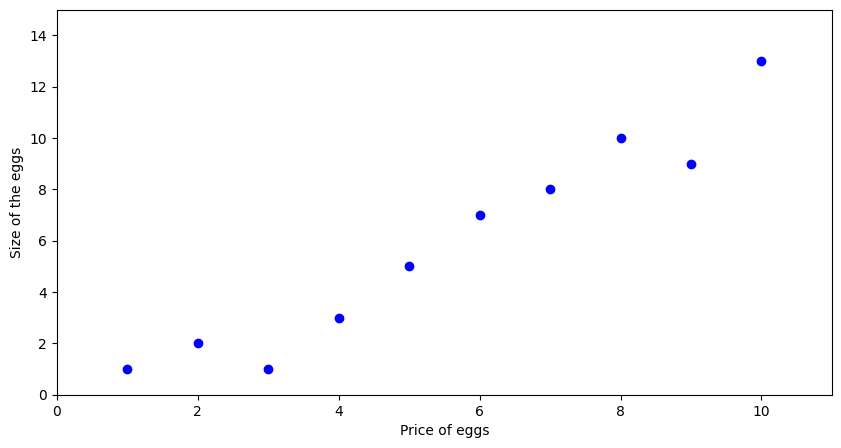

In [2]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 2, 1, 3, 5, 7, 8, 10, 9, 13]
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Sine Wave', color='blue')
plt.xlabel('Price of eggs')
plt.ylabel('Size of the eggs')
plt.xlim(0, 11)
plt.ylim(0, 15)

### Fit a basic line based on some assumption

For the given dataset, lets fit a linear curve:

\[
\begin{aligned}
y =  w * x + b
\end{aligned}
\]

where:
- w is the slope of the function (called as weight)
- b is the intercept (called as bias)

(0.0, 15.0)

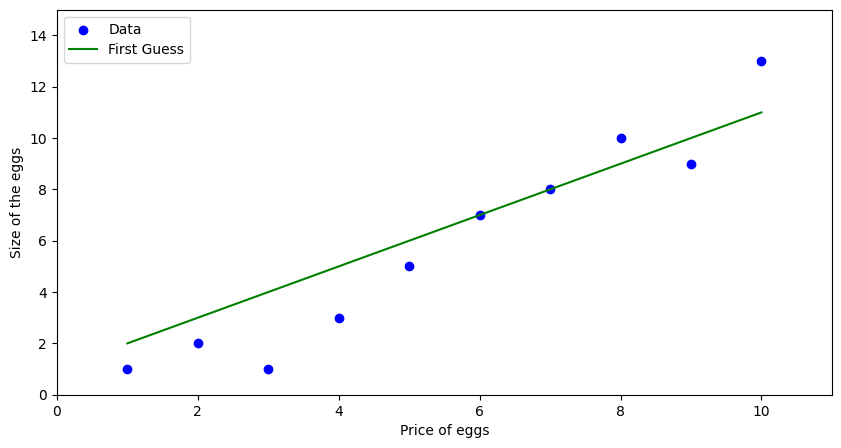

In [3]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 2, 1, 3, 5, 7, 8, 10, 9, 13])
f = lambda x: 1 * x + 1
z = f(x)
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, color='green', label='First Guess')
plt.xlabel('Price of eggs')
plt.ylabel('Size of the eggs')
plt.legend()
plt.xlim(0, 11)
plt.ylim(0, 15)

(0.0, 15.0)

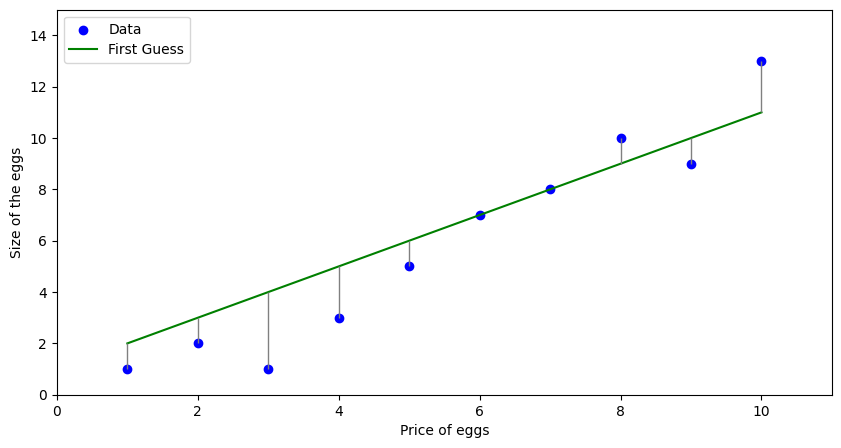

In [4]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 2, 1, 3, 5, 7, 8, 10, 9, 13])
f = lambda x: 1 * x + 1
z = f(x)
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, color='green', label='First Guess')
for xi, yi, zi in zip(x, y, z):
    # plt.scatter(xi, zi, color='green')
    plt.vlines([xi], ymin=yi, ymax=zi, color='gray', linestyle='-', linewidth=1)
plt.xlabel('Price of eggs')
plt.ylabel('Size of the eggs')
plt.legend()
plt.xlim(0, 11)
plt.ylim(0, 15)

In [5]:
L1 = lambda z, y: np.sum(np.abs(y-z))
L2 = lambda z, y: np.sum((y-z)**2)
MAE = lambda z, y: np.sum(np.abs(y - z)) / len(y)
MSE = lambda z, y: np.sum((y - z)**2) / len(y)
#Huber Loss ( combination of MAE and MASE)
Huber_L = lambda y, z, delta: np.where(np.abs(y - z) < delta, 0.5 * (y - z) ** 2, delta * (np.abs(y - z) - 0.5 * delta))

In [6]:
print("L1:", L1(z, y))
print("L2:", L2(z, y))
print("MAE:", MAE(z, y))
print("MSE:", MSE(z, y))

L1: 12
L2: 22
MAE: 1.2
MSE: 2.2


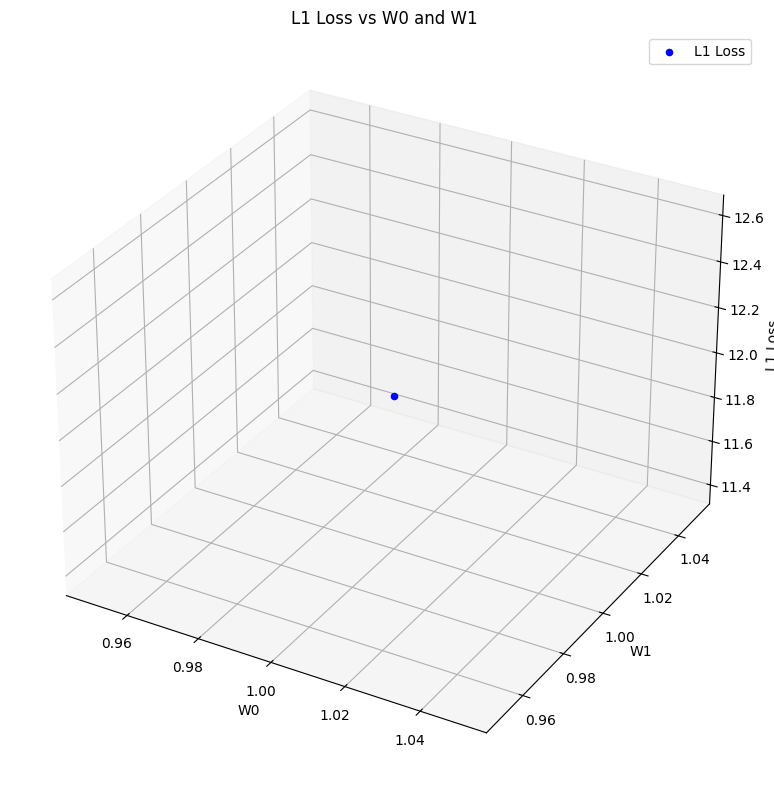

In [7]:
L1_list =[]
W0_list = []
W1_list = []

L1_list.append(L1(z, y))
W0_list.append(1)
W1_list.append(1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(W0_list, W1_list, L1_list, color='blue', label='L1 Loss')
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('L1 Loss')
ax.set_title('L1 Loss vs W0 and W1')
ax.legend()
plt.tight_layout()
plt.show()


### Gradient Descent Update Rules

Given a simple linear regression model:

\[
\hat{y}_i = w_1 x_i + w_0
\]

The weights are updated using gradient descent as follows:

\[
\begin{aligned}
w_0 &\leftarrow w_0 - \alpha \cdot \frac{2}{N} \sum_{i=1}^{N} \left( w_1 x_i + w_0 - y_i \right) \\
w_1 &\leftarrow w_1 - \alpha \cdot \frac{2}{N} \sum_{i=1}^{N} x_i \cdot \left( w_1 x_i + w_0 - y_i \right)
\end{aligned}
\]

Where:
- \( \alpha \) is the learning rate  
- \( N \) is the number of samples  
- \( y_i \) is the true label  
- \( \hat{y}_i = w_1 x_i + w_0 \) is the predicted value


![alt text](tiduxiajiang-1.png "Title")

### Weight Update Function for Linear Regression

The function below performs one step of gradient descent to update the weights \( w_0 \) (bias) and \( w_1 \) (slope) for a simple linear regression model:

```python
def update_weights(w0, w1, learning_rate=0.01):
    w0 -= learning_rate * (2/len(x) * np.sum([w1*x + w0 - y for x, y in zip(x, y)]))
    w1 -= learning_rate * (2/len(x) * np.sum([2*x * (w1*x + w0 - y) for x, y in zip(x, y)]))
    return w0, w1



### Loss here is based on the mean squared error

Given a simple linear regression model:

\[
\begin{aligned}
mse =  \frac{1}{N} \sum_{i=1}^{N} \left( y_{pred} - y_{real} \right)^2
\end{aligned}
\]

In [8]:
w0=0
w1=0
def update_weights(w0, w1, learning_rate=0.01):
    w0 -= learning_rate * (2/len(x)*np.sum([w1*x+w0-y for x, y in zip(x, y)]))
    w1 -= learning_rate * (2/len(x)*np.sum([2*x*(w1*x+w0-y) for x, y in zip(x, y)]))
    return w0, w1


### Loss here is based on the absolute error (L1 loss)

Given a simple linear regression model:

\[
\begin{aligned}
L1 =   \sum_{i=1}^{N} \left( |y_{pred} - y_{real}| \right)
\end{aligned}
\]

The L1 loss function is defined as:


\begin{aligned}
L = \sum_{i=1}^n \left| y_i - (w_1 x_i + w_0) \right|
\end{aligned}


The subgradient of the absolute value function is:

\begin{aligned}
\frac{\partial}{\partial z} |z| = 
\begin{cases}
+1 & \text{if } z > 0 \\
-1 & \text{if } z < 0 \\
[-1, 1] & \text{if } z = 0
\end{cases}
\end{aligned}

where 
\begin{aligned} 
( z = y_i - (w_1 x_i + w_0) )
\end{aligned}.

Using this, the gradients for parameters \( w_0 \) and \( w_1 \) are:

\begin{aligned}
\frac{\partial L}{\partial w_0} = \frac{1}{n} \sum_{i=1}^n \text{sign}\big( (w_1 x_i + w_0) - y_i \big)
\end{aligned}

\begin{aligned}
\frac{\partial L}{\partial w_1} = \frac{1}{n} \sum_{i=1}^n x_i \cdot \text{sign}\big( (w_1 x_i + w_0) - y_i \big)
\end{aligned}

Then, the gradient descent update rules become:

\begin{aligned}
w_0 \leftarrow w_0 - \eta \frac{\partial L}{\partial w_0}
\end{aligned}

\begin{aligned}
w_1 \leftarrow w_1 - \eta \frac{\partial L}{\partial w_1}
\end{aligned}

where \(\eta\) is the learning rate.


In [9]:
def update_weights_l1(w0, w1, learning_rate=0.01):
    preds = w1 * x + w0
    errors = preds - y
    signs = np.sign(errors)
    grad_w0 = np.sum(signs) 
    grad_w1 = np.sum(signs * x) 
    w0 -= learning_rate * grad_w0
    w1 -= learning_rate * grad_w1

    return w0, w1


100%|██████████| 100/100 [00:00<00:00, 3796.64it/s]

Epoch 1, w0: 0.0100, w1: 0.0550, L1 Loss: 55.8750
Epoch 2, w0: 0.0200, w1: 0.1100, L1 Loss: 52.7500
Epoch 3, w0: 0.0300, w1: 0.1650, L1 Loss: 49.6250
Epoch 4, w0: 0.0400, w1: 0.2200, L1 Loss: 46.5000
Epoch 5, w0: 0.0500, w1: 0.2750, L1 Loss: 43.3750
Epoch 6, w0: 0.0600, w1: 0.3300, L1 Loss: 40.3500
Epoch 7, w0: 0.0680, w1: 0.3790, L1 Loss: 37.8850
Epoch 8, w0: 0.0760, w1: 0.4280, L1 Loss: 35.4200
Epoch 9, w0: 0.0840, w1: 0.4770, L1 Loss: 32.9550
Epoch 10, w0: 0.0920, w1: 0.5260, L1 Loss: 30.4900
Epoch 11, w0: 0.1000, w1: 0.5750, L1 Loss: 28.0250
Epoch 12, w0: 0.1080, w1: 0.6240, L1 Loss: 25.5600
Epoch 13, w0: 0.1160, w1: 0.6730, L1 Loss: 23.0950
Epoch 14, w0: 0.1240, w1: 0.7220, L1 Loss: 20.6540
Epoch 15, w0: 0.1300, w1: 0.7630, L1 Loss: 18.9370
Epoch 16, w0: 0.1360, w1: 0.8040, L1 Loss: 17.2200
Epoch 17, w0: 0.1420, w1: 0.8450, L1 Loss: 15.5030
Epoch 18, w0: 0.1480, w1: 0.8860, L1 Loss: 13.8540
Epoch 19, w0: 0.1520, w1: 0.9250, L1 Loss: 12.3210
Epoch 20, w0: 0.1540, w1: 0.9600, L1 Los

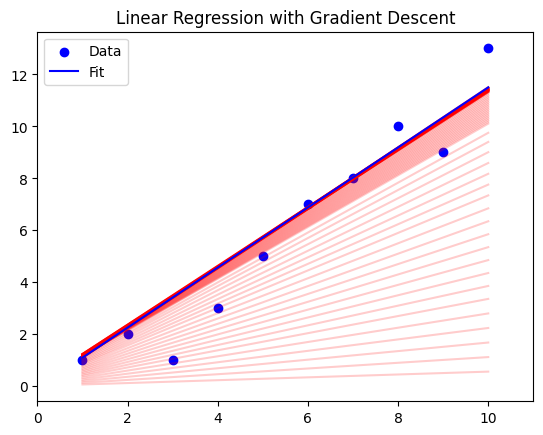

In [18]:
w0=0
w1=0
epoch = 100
mse = []
iterations = np.arange(epoch)
L1_list =[]
W0_list = []
W1_list = []
n = 0 
from tqdm import tqdm
for i in tqdm(range(epoch)):
    w0, w1 = update_weights_l1(w0, w1, learning_rate=0.001)
    W0_list.append(w0)
    W1_list.append(w1)
    plt.plot(x, [w0 + w1 * xi for xi in x], color='red', alpha=0.2)
    a = w0 + w1 * np.array(x)
    b = np.array(y)
    L1loss = np.sum(np.abs(b - a))
    L1_list.append(L1loss)
    ##Stopping Condition
    if n == 0:
        f_w0 = w0
        f_w1 = w1
    # if i == 0:
    #     L1loss_prev = L1loss
    # else:
    #     if L1loss_prev > L1loss:
    #         L1loss_prev = L1loss
    #     else:
    #         L1loss_prev = L1loss
    #         n += 1
    # if n > 2:
    #     print("Stopping early after 3 iterations with no decrease in loss")
    #     break
    print(f'Epoch {i+1}, w0: {w0:.4f}, w1: {w1:.4f}, L1 Loss: {L1loss:.4f}')

z = f_w0 + f_w1 * x
plt.scatter(x, y, label='Data', color='blue')
plt.plot(x, z, label='Fit', color='blue')
plt.title('Linear Regression with Gradient Descent')
plt.xlim(0, 11)
plt.legend()
# plt.ylim(-100, 15)

/var/folders/8p/dgslxnm15hn4k2p1pv_qsp500000gn/T/ipykernel_9570/4216406811.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(W0, W1, L1, cmap='viridis', label='L1 movement')


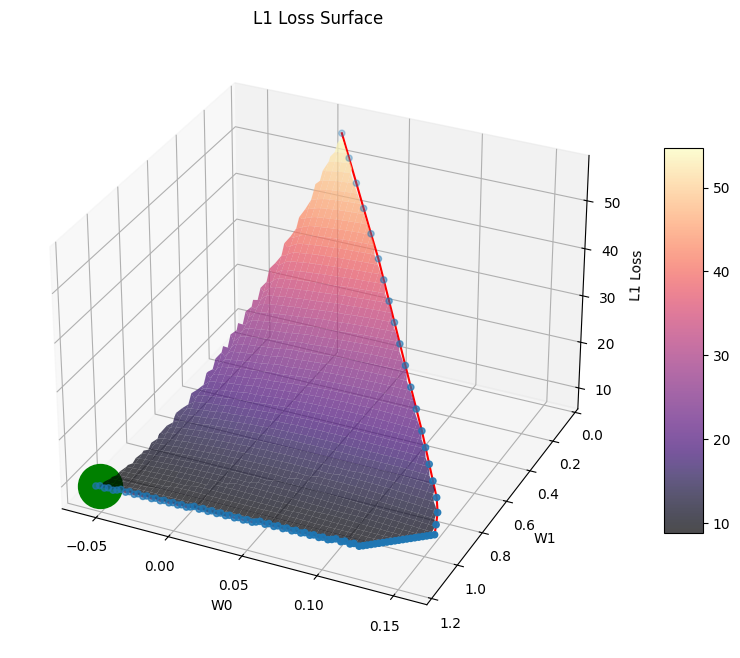

In [22]:
from scipy.interpolate import griddata
W0 = np.array(W0_list)
W1 = np.array(W1_list)
L1 = np.array(L1_list)
min_idx = np.argmin(L1)
min_w0 = W0[min_idx]
min_w1 = W1[min_idx]
min_l1 = L1[min_idx]

# Create a grid over the domain
grid_w0, grid_w1 = np.meshgrid(
    np.linspace(W0.min(), W0.max(), 100),
    np.linspace(W1.min(), W1.max(), 100)
)

# Interpolate L1 values on the grid
grid_l1 = griddata((W0, W1), L1, (grid_w0, grid_w1), method='cubic')

# Plot the surface
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_w0, grid_w1, grid_l1, cmap='magma', edgecolor='none', alpha=0.7)
ax.scatter(W0, W1, L1, cmap='viridis', label='L1 movement')
ax.plot(W0, W1, L1, color='red', label='L1 movement')
ax.scatter(min_w0, min_w1, min_l1, color='green', s=1000, label='Min L1')
ax.view_init(210, 245)
ax.invert_zaxis()
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('L1 Loss')
ax.set_title('L1 Loss Surface')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 4222.60it/s]

15.292800781600011
Epoch 1, w0: 0.1180, w1: 1.7100, MSE: 15.2928
5.302475369846372
Epoch 2, w0: 0.0455, w1: 0.8026, MSE: 5.3025
2.5296983609060533
Epoch 3, w0: 0.0743, w1: 1.2863, MSE: 2.5297
1.7160215568464536
Epoch 4, w0: 0.0494, w1: 1.0306, MSE: 1.7160
1.497984859362696
Epoch 5, w0: 0.0530, w1: 1.1678, MSE: 1.4980
1.4258949318668492
Epoch 6, w0: 0.0415, w1: 1.0962, MSE: 1.4259
1.4068758210617347
Epoch 7, w0: 0.0381, w1: 1.1357, MSE: 1.4069
1.3966169211456134
Epoch 8, w0: 0.0304, w1: 1.1161, MSE: 1.3966
1.3921661557980425
Epoch 9, w0: 0.0250, w1: 1.1278, MSE: 1.3922
1.3876275741915003
Epoch 10, w0: 0.0185, w1: 1.1229, MSE: 1.3876
1.3840142021408155
Epoch 11, w0: 0.0126, w1: 1.1269, MSE: 1.3840
1.380194421597563
Epoch 12, w0: 0.0064, w1: 1.1261, MSE: 1.3802
1.3765985588403742
Epoch 13, w0: 0.0004, w1: 1.1278, MSE: 1.3766
1.3729509813236178
Epoch 14, w0: -0.0057, w1: 1.1282, MSE: 1.3730
1.3693837260676553
Epoch 15, w0: -0.0117, w1: 1.1293, MSE: 1.3694
1.3658227198069086
Epoch 16, w0: -

(0.0, 11.0)

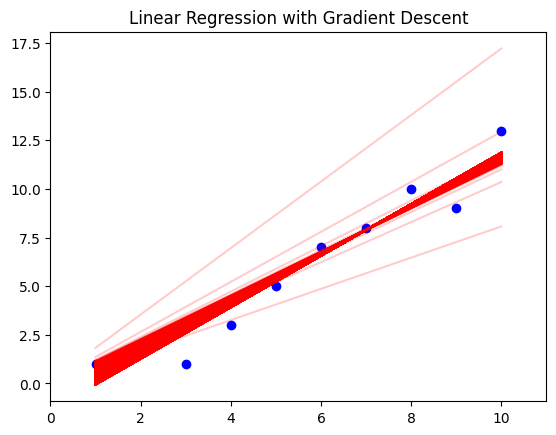

In [141]:
w0=0
w1=0
epoch = 1000
mse = []
iterations = np.arange(epoch)
L2_list =[]
W0_list = []
W1_list = []
from tqdm import tqdm
for i in tqdm(range(epoch)):
    w0, w1 = update_weights(w0, w1, learning_rate=0.01)
    W0_list.append(w0)
    W1_list.append(w1)
    plt.plot(x, [w0 + w1 * xi for xi in x], color='red', alpha=0.2)
    a = w0 + w1 * np.array(x)
    b = np.array(y)
    mean_squared_error = np.mean((a - b) ** 2)
    print(mean_squared_error)
    L2_list.append(mean_squared_error)
    print(f'Epoch {i+1}, w0: {w0:.4f}, w1: {w1:.4f}, MSE: {mean_squared_error:.4f}')

plt.scatter(x, y, label='Sine Wave', color='blue')
plt.title('Linear Regression with Gradient Descent')
plt.xlim(0, 11)
# plt.ylim(-100, 15)

0.9564469924916391


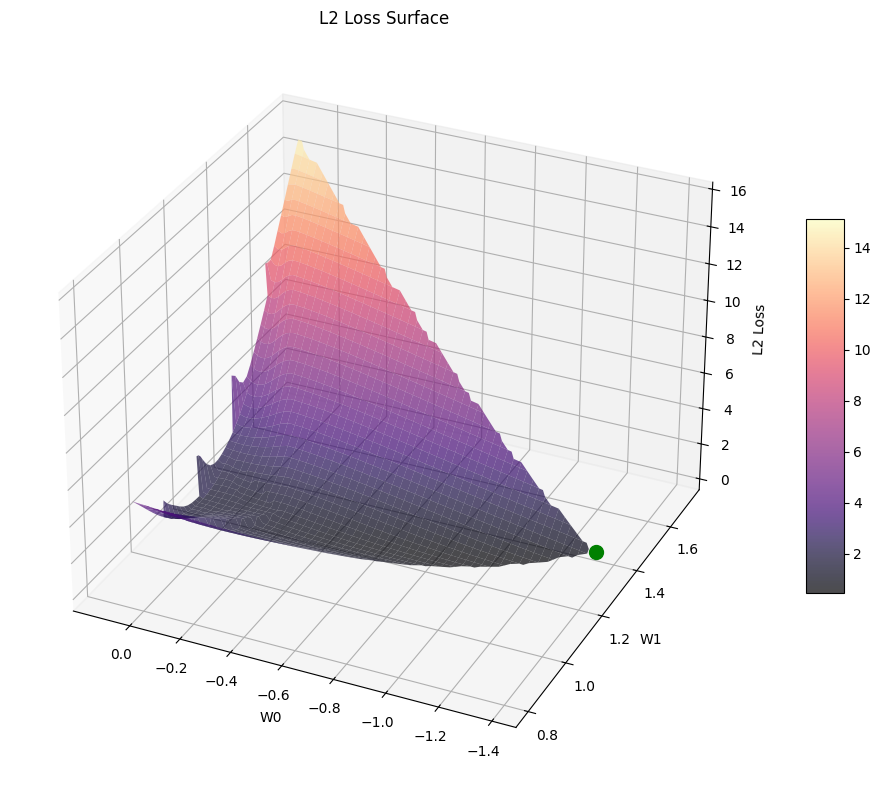

In [142]:
from scipy.interpolate import griddata
W0 = np.array(W0_list)
W1 = np.array(W1_list)
L2 = np.array(L2_list)
min_idx = np.argmin(L2)
min_w0 = W0[min_idx]
min_w1 = W1[min_idx]
min_l2 = L2[min_idx]
print(min_l2)
# Create a grid over the domain
grid_w0, grid_w1 = np.meshgrid(
    np.linspace(W0.min(), W0.max(), 100),
    np.linspace(W1.min(), W1.max(), 100)
)

# Interpolate L1 values on the grid
grid_l2 = griddata((W0, W1), L2, (grid_w0, grid_w1), method='cubic')

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_w0, grid_w1, grid_l2, cmap='magma', edgecolor='none', alpha=0.7)
ax.scatter(min_w0, min_w1, min_l2, color='green', s=100, label='Min L2')
ax.view_init(210, 65)
ax.invert_zaxis()
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('L2 Loss')
ax.set_title('L2 Loss Surface')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()

In [20]:
w0, w1 = 0, 0
w0_list = []
w1_list = []
epochs= 100

for _ in range(epochs):
    w0, w1 = update_weights(w0, w1, learning_rate=0.001)#, learning_rate=0.00001)
    w0_list.append(w0)
    w1_list.append(w1)

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y, label='Data', color='blue', alpha=0.6)
line, = ax.plot([], [], color='red', lw=2)
title = ax.text(0.5, 1.05, "", transform=ax.transAxes, ha="center")

def init():
    line.set_data([], [])
    title.set_text("")
    return line, title

def animate(i):
    y_pred = [w0_list[i] + w1_list[i] * xi for xi in x]
    mse_i = np.mean((np.array(y_pred) - y) ** 2)
    line.set_data(x, y_pred)
    title.set_text(f"Epoch {i+1}, w0={w0_list[i]:.2f}, w1={w1_list[i]:.2f}, MSE={mse_i:.2f}")
    return line, title


anim = FuncAnimation(fig, animate, init_func=init, frames=epochs, interval=300, blit=True)
anim.save("show-plot.gif", writer=PillowWriter(fps=4))
plt.clf()

<Figure size 800x500 with 0 Axes>

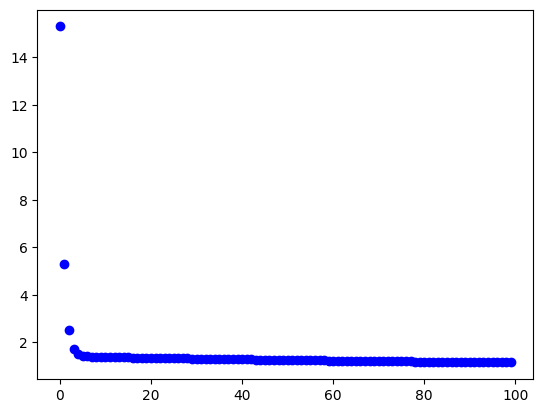

In [19]:
plt.scatter(iterations, mse, label='Sine Wave', color='blue')
# plt.xlim(0, 20)